In [1]:
import pyfesom2 as pf
import matplotlib.cm as cm
import matplotlib.pylab as plt
import numpy as np
import netCDF4 as nc
import argparse, os, sys

In [11]:
def  amoc_depth_onetime(meshdir, datadir, ystart, yend ,
                        foutname='amoc_depth.nc',
                        nlats=361,
                        choose_mask = "Atlantic_MOC",
                        **kwargs):
    ''' masks:
    Ocean Basins:
        "Atlantic_Basin"
        "Pacific_Basin"
        "Indian_Basin"
        "Arctic_Basin"
        "Southern_Ocean_Basin"
        "Mediterranean_Basin"
        "Global Ocean"
        "Global Ocean 65N to 65S"
        "Global Ocean 15S to 15N"
    MOC Basins:
        "Atlantic_MOC"
        "IndoPacific_MOC"
        "Pacific_MOC"
        "Indian_MOC"
    Nino Regions:
        "Nino 3.4"
        "Nino 3"
        "Nino 4"
    '''
    mesh = pf.load_mesh(meshdir)

    #kwargs = {'use_cftime': 'True', }
    # get data
    data1 = pf.get_data(datadir, 'w', range(ystart,yend), mesh, how="mean", compute=True, **kwargs )
    data2 = pf.get_data(datadir, 'bolus_w', range(ystart,yend), mesh, how="mean", compute=True , **kwargs )
    print("--> years, nodes, levels", data1.shape)
    data=data1+data2
    print(data.shape)

    # get mask
    # mask1 = pf.get_mask(mesh, "Atlantic_Basin")
    # mask2 = pf.get_mask(mesh, "Arctic_Basin")
    # mask3 = mask1|mask2

    lats, moc = pf.xmoc_data(mesh, data, mask=choose_mask, nlats=nlats)
    print(moc.shape)

    # write to file
    fout = nc.Dataset(foutname, 'w')

    fout.createDimension('lat', nlats)
    latout = fout.createVariable('lat',np.float32, ('lat',))
    latout.units = 'degree_north'
    latout.standard_name = 'latitude'
    latout[:] = lats

    fout.createDimension('level', len(mesh.zlev[:]))
    levout = fout.createVariable('level',np.float32,('level',))
    levout.units = 'm'
    levout.positive = "down"
    levout.axis = "Z"
    levout[:] = np.abs(mesh.zlev[:])


    fout.createDimension('time', None)
    timeout = fout.createVariable('time',np.float32,('time',))
    timeout.units = 'years since '+str(int((ystart+yend)/2))+'-01-01'

    varout = fout.createVariable('AMOC',np.float32,('time','level','lat'))
    varout[0,:,:] = np.transpose(moc)

    fout.close()

    ######### plot

    plt.figure(figsize=(10, 3))
    pf.plot_xyz(mesh, moc, xvals=lats, maxdepth=7000, cmap=cm.seismic, levels = np.linspace(-20, 20, 41),
                facecolor='gray', label='Sv')
    # plt.savefig(foutname.replace('.nc','.png'))
    # plt.show(block=False)
    # plt.pause(3)
    # plt.close()


    return lats, moc 

- the mesh information
/home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed/pickle_mesh_py3_fesom2
Depth is None, 3d field will be returned
Depth is None, 3d field will be returned
--> years, nodes, levels (95239, 48)
(95239, 48)
(361, 48)


(array([-90. , -89.5, -89. , -88.5, -88. , -87.5, -87. , -86.5, -86. ,
        -85.5, -85. , -84.5, -84. , -83.5, -83. , -82.5, -82. , -81.5,
        -81. , -80.5, -80. , -79.5, -79. , -78.5, -78. , -77.5, -77. ,
        -76.5, -76. , -75.5, -75. , -74.5, -74. , -73.5, -73. , -72.5,
        -72. , -71.5, -71. , -70.5, -70. , -69.5, -69. , -68.5, -68. ,
        -67.5, -67. , -66.5, -66. , -65.5, -65. , -64.5, -64. , -63.5,
        -63. , -62.5, -62. , -61.5, -61. , -60.5, -60. , -59.5, -59. ,
        -58.5, -58. , -57.5, -57. , -56.5, -56. , -55.5, -55. , -54.5,
        -54. , -53.5, -53. , -52.5, -52. , -51.5, -51. , -50.5, -50. ,
        -49.5, -49. , -48.5, -48. , -47.5, -47. , -46.5, -46. , -45.5,
        -45. , -44.5, -44. , -43.5, -43. , -42.5, -42. , -41.5, -41. ,
        -40.5, -40. , -39.5, -39. , -38.5, -38. , -37.5, -37. , -36.5,
        -36. , -35.5, -35. , -34.5, -34. , -33.5, -33. , -32.5, -32. ,
        -31.5, -31. , -30.5, -30. , -29.5, -29. , -28.5, -28. , -27.5,
      

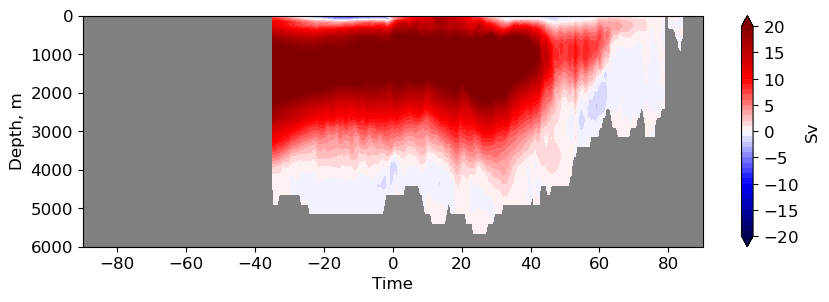

In [13]:
######## Define #################
kwargs = {'use_cftime': 'True', 'naming_convention' : "custom", 'naming_template':"{}.{}.{}01.01.nc"}

# expname='tran-38pma1-v2-38k'
meshpath = '/home/a/a270075/ba0989/pool/meshes/base21k/mesh_ice38pma1_ocean21_shallowMed/'
datapath='/home/a/a270075/ba0989/awiesm2.5/experiments-3/21k/outdata/fesom/'

ystart = 2080
yend = 2100

### set the mesh and data information
print("- the mesh information")
fname = 'amoc_depth_'+str(ystart)+'-'+str(yend)+'.nc'
amoc_depth_onetime(meshpath,datapath, ystart, yend,  foutname=fname,nlats=361, **kwargs)

